# About

**This Lab Enhancement : Logistic Regression is prepared by** 

- Group Member 1 - Nur Damia Binti Rohisyam (Student ID - 1211304435)

- Group Member 2 - Faqihah Binti Zakir (Student ID - 1211303109)

- Group Member 3 - Muhammad Zafri Bin Marwan (Student ID - 1201101871)

**Objective:**

To build a logistic regression model for predicting whether patients have a 10-year risk of future coronary heart disease (CHD).

**Dataset Description:**

Link - https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression.
The dataset is publicly available on the Kaggle website and is part of an ongoing cardiovascular study involving residents of Framingham, Massachusetts. The dataset contains information about the patients, comprising over 4,000 records and 15 attributesm

# Data and Library Insertion

In [10]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

In [11]:
df = pd.read_csv('framingham.csv')

In [12]:
#Renaming Columns
new_column_names = {
    'male': 'Sex', #male or female (Nominal)
    'age': 'Age', #Age of the patient (Continuous)
    'currentSmoker': 'CurrentSmoker', #whether or not the patient is a current smoker (Nominal)
    'cigsPerDay': 'CigsPerDay', #the number of cigarettes that the person smoked on average in one day (Continuous)
    'BPMeds': 'BPMeds', #whether or not the patient was on blood pressure medication (Nominal)
    'prevalentStroke': 'PrevalentStroke', #whether or not the patient had previously had a stroke (Nominal)
    'prevalentHyp': 'PrevalentHyp', #whether or not the patient was hypertensive (Nominal)
    'diabetes': 'Diabetes', #whether or not the patient had diabetes (Nominal)
    'totChol': 'TotChol', #total cholesterol level (Continuous)
    'sysBP': 'SysBP' ,#systolic blood pressure (Continuous)
    'diaBP': 'DiaBP', #diastolic blood pressure (Continuous)
    'BMI': 'BMI', #Body Mass Index (Continuous)
    'heartRate': 'HeartRate', #heart rate (Continuous)
    'glucose': 'Glucose', #glucose level (Continuous)
    'TenYearCHD': '10YearCHD'
    #10 year risk of coronary heart disease (Binary: "1" means "Yes", "0" means "No")
}

# Rename the columns
df = df.rename(columns=new_column_names)

# Print the first few rows to verify
print(df.head())

   Sex  Age  education  CurrentSmoker  CigsPerDay  BPMeds  PrevalentStroke  \
0    1   39        4.0              0         0.0     0.0                0   
1    0   46        2.0              0         0.0     0.0                0   
2    1   48        1.0              1        20.0     0.0                0   
3    0   61        3.0              1        30.0     0.0                0   
4    0   46        3.0              1        23.0     0.0                0   

   PrevalentHyp  Diabetes  TotChol  SysBP  DiaBP    BMI  HeartRate  Glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   10YearCHD  
0          0  
1          0  
2          

In [13]:
df.head()

,Sex,Age,education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,10YearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Preprocessing

In [15]:
# check dimensionality
print("Number of rows:", df.shape[0])
print("Number of features/columns:", df.shape[1] ) 

Number of rows: 4238
Number of features/columns: 16


In [16]:
#missing value
df.isna().sum()

Sex                  0
Age                  0
education          105
CurrentSmoker        0
CigsPerDay          29
BPMeds              53
PrevalentStroke      0
PrevalentHyp         0
Diabetes             0
TotChol             50
SysBP                0
DiaBP                0
BMI                 19
HeartRate            1
Glucose            388
10YearCHD            0
dtype: int64

In [17]:
# Drop rows with missing values
df.dropna(inplace=True)

In [18]:
#duplicated values
print("Total duplicated rows: ", sum(df.duplicated()))

# drop duplicated value
df = df.drop_duplicates()
print("Total duplicated rows After Removing Duplicated Rows: ", sum(df.duplicated()))

Total duplicated rows:  0
Total duplicated rows After Removing Duplicated Rows:  0


In [19]:
# Classify features

binary_features = [
    'Sex', 'CurrentSmoker', 'BPMeds', 'PrevalentStroke', 'PrevalentHyp', 'Diabetes'
]

# Define which columns are numeric
numeric_features = [
    'Age', 'education', 'CigsPerDay', 'TotChol', 'SysBP', 'DiaBP', 'BMI', 'Glucose','HeartRate'
]
target = ['10YearCHD']

# Display the categorized columns
print("Numeric Features:")
print(df[numeric_features].head())
print("Binary Features:")
print(df[binary_features].head())
print("\nTarget:")
print(df[target].head())

Numeric Features:
   Age  education  CigsPerDay  TotChol  SysBP  DiaBP    BMI  Glucose  \
0   39        4.0         0.0    195.0  106.0   70.0  26.97     77.0   
1   46        2.0         0.0    250.0  121.0   81.0  28.73     76.0   
2   48        1.0        20.0    245.0  127.5   80.0  25.34     70.0   
3   61        3.0        30.0    225.0  150.0   95.0  28.58    103.0   
4   46        3.0        23.0    285.0  130.0   84.0  23.10     85.0   

   HeartRate  
0       80.0  
1       95.0  
2       75.0  
3       65.0  
4       85.0  
Binary Features:
   Sex  CurrentSmoker  BPMeds  PrevalentStroke  PrevalentHyp  Diabetes
0    1              0     0.0                0             0         0
1    0              0     0.0                0             0         0
2    1              1     0.0                0             0         0
3    0              1     0.0                0             1         0
4    0              1     0.0                0             0         0

Target:
   10Ye

In [20]:
# Display the modified DataFrame to verify changes
print(df.dtypes)

Sex                  int64
Age                  int64
education          float64
CurrentSmoker        int64
CigsPerDay         float64
BPMeds             float64
PrevalentStroke      int64
PrevalentHyp         int64
Diabetes             int64
TotChol            float64
SysBP              float64
DiaBP              float64
BMI                float64
HeartRate          float64
Glucose            float64
10YearCHD            int64
dtype: object


In [21]:
# Check unique values for each feature
for feature in binary_features + numeric_features + target:
    unique_values = df[feature].unique()
    print(f"Unique values for '{feature}': {unique_values}")

Unique values for 'Sex': [1 0]
Unique values for 'CurrentSmoker': [0 1]
Unique values for 'BPMeds': [0. 1.]
Unique values for 'PrevalentStroke': [0 1]
Unique values for 'PrevalentHyp': [0 1]
Unique values for 'Diabetes': [0 1]
Unique values for 'Age': [39 46 48 61 43 63 45 52 50 41 38 42 44 47 35 60 36 59 54 37 53 49 65 51
 62 40 56 67 57 66 64 55 58 68 34 33 32 70 69]
Unique values for 'education': [4. 2. 1. 3.]
Unique values for 'CigsPerDay': [ 0. 20. 30. 23. 15. 10.  5. 35. 43.  1. 40.  3.  9.  2. 12.  4. 18. 60.
 25. 45.  8. 13. 11.  7.  6. 38. 50. 29. 17. 16. 19. 70. 14.]
Unique values for 'TotChol': [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 221.
 232. 291. 190. 234. 215. 270. 272. 295. 226. 209. 214. 178. 233. 180.
 243. 237. 311. 208. 252. 261. 179. 267. 216. 240. 266. 255. 185. 220.
 235. 212. 223. 300. 302. 175. 189. 258. 202. 183. 274. 170. 210. 197.
 326. 188. 256. 244. 193. 239. 296. 269. 275. 268. 265. 173. 273. 290.
 278. 264. 282. 257. 241. 288. 2

In [22]:
# Summary statistics
df.describe()

,Sex,Age,education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,10YearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Exploratory Data Analysis

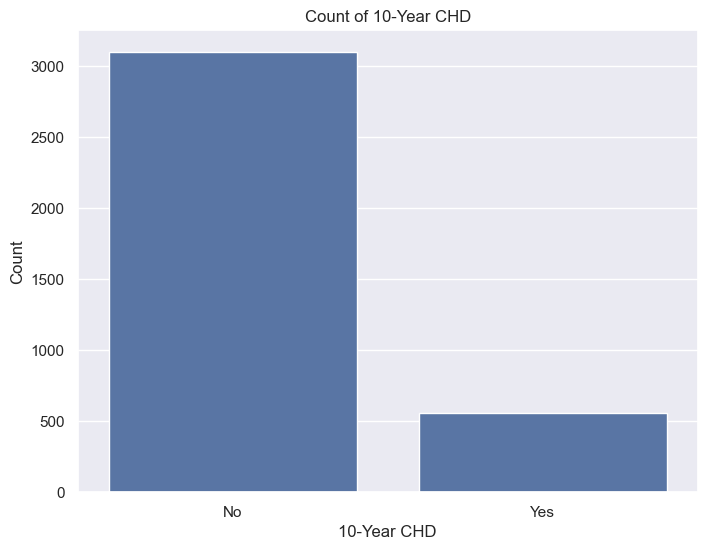

In [24]:
target = df['10YearCHD']

# Create a bar plot for '10YearCHD'
plt.figure(figsize=(8, 6))
sns.countplot(x='10YearCHD', data=df)
plt.title('Count of 10-Year CHD')
plt.xlabel('10-Year CHD')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Customizing the x-axis ticks
plt.show()

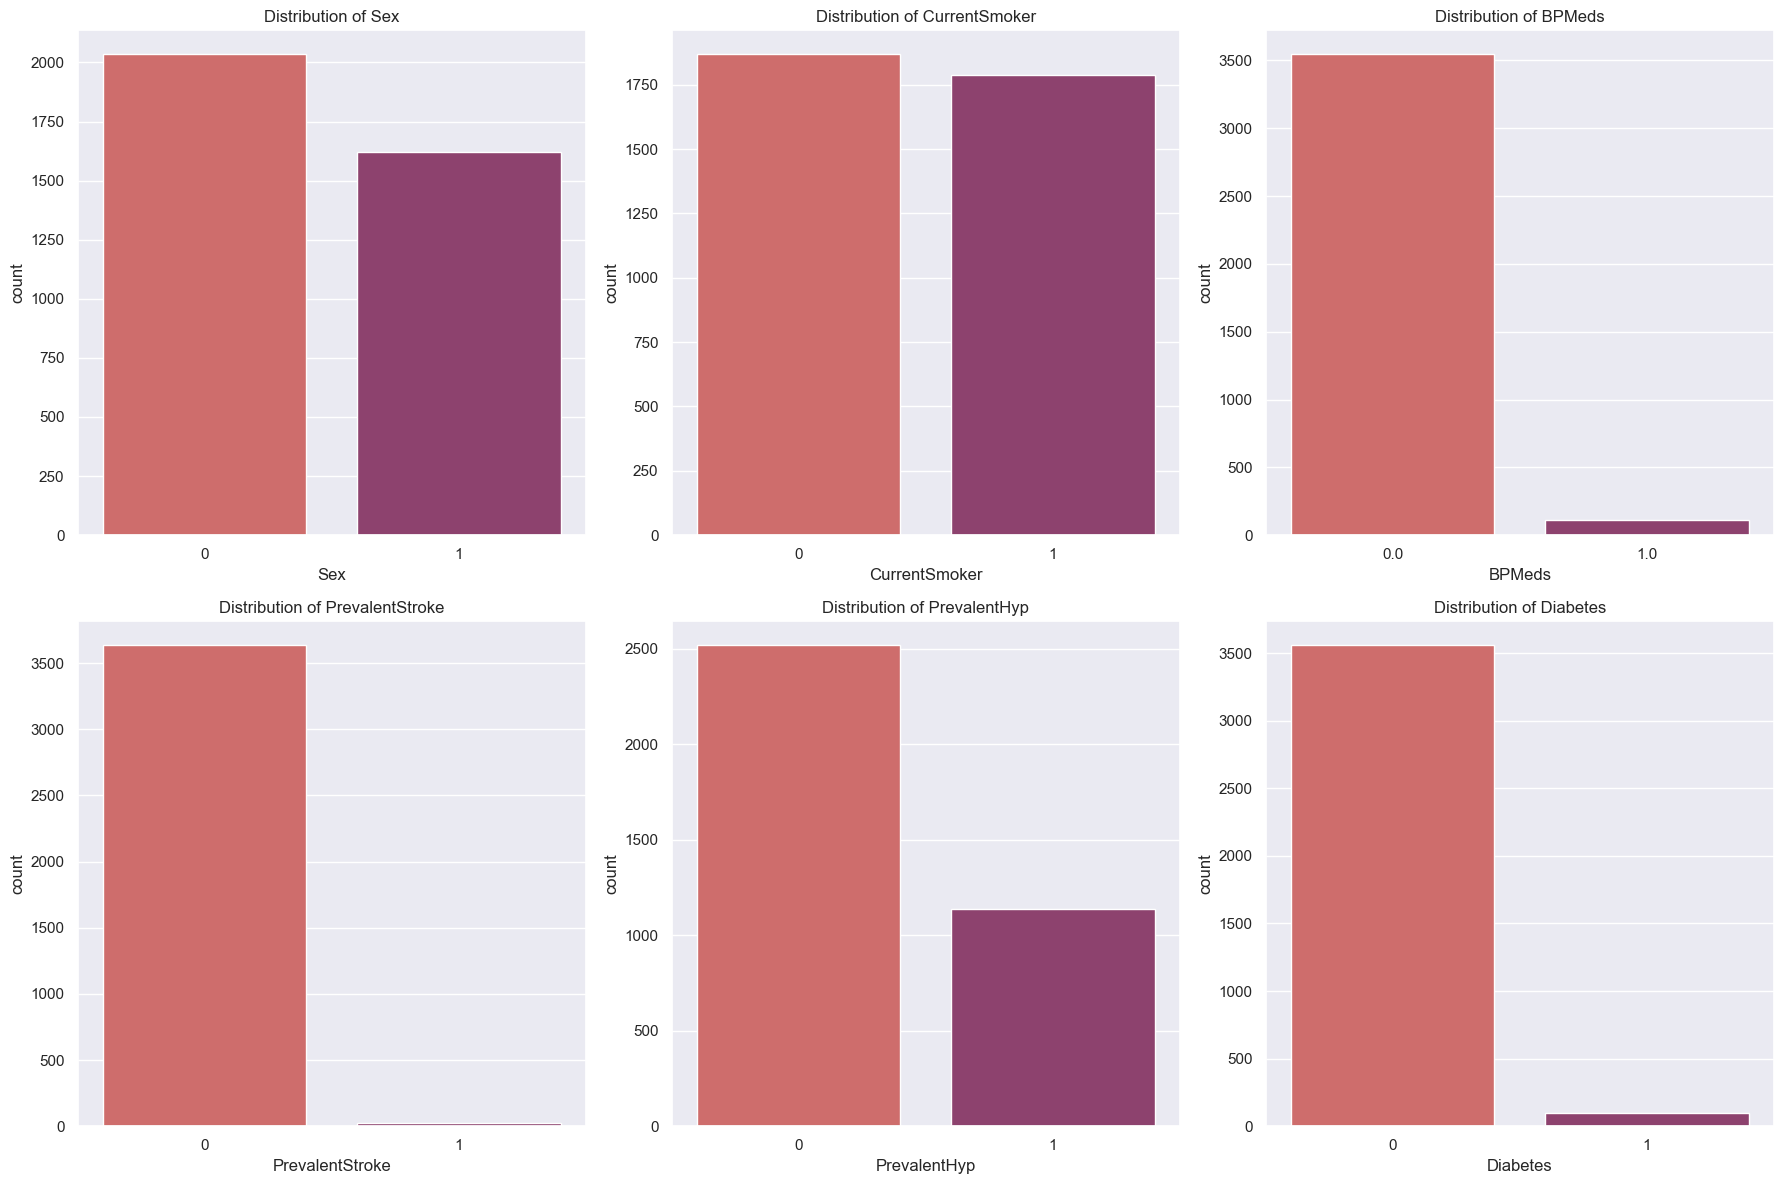

In [25]:
# Set up subplots for plotting
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Loop through binary features and create plots
for i, feature in enumerate(binary_features):
    row, col = i // 3, i % 3
    sns.countplot(x=feature, hue=feature, data=df, ax=axes[row, col], palette='flare', legend=False)
    axes[row, col].set_title(f'Distribution of {feature}')

# Remove unused subplots
for j in range(i+1, 6):
    fig.delaxes(axes[j // 3, j % 3])

plt.tight_layout()
plt.show()

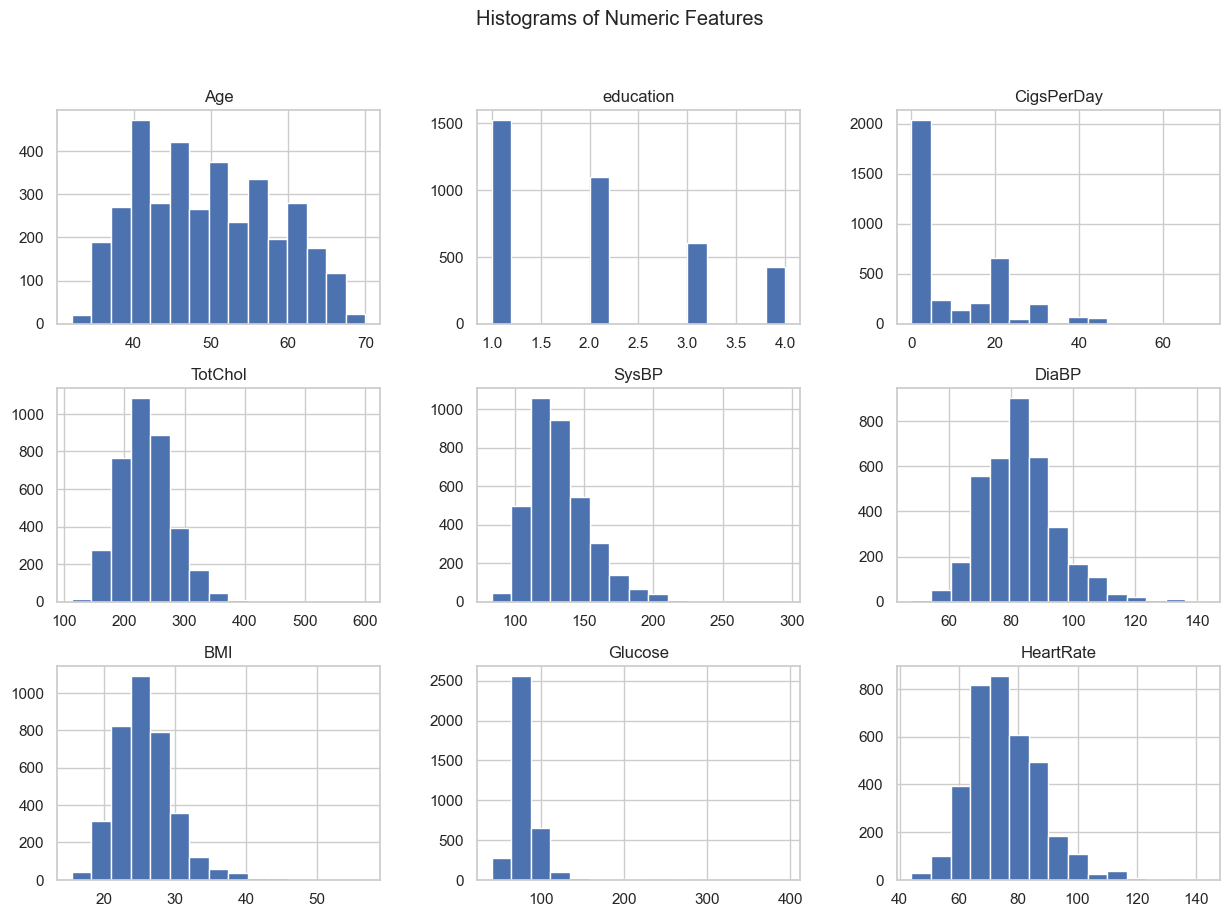

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create histograms for each numeric feature
df[numeric_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Features')
plt.show()

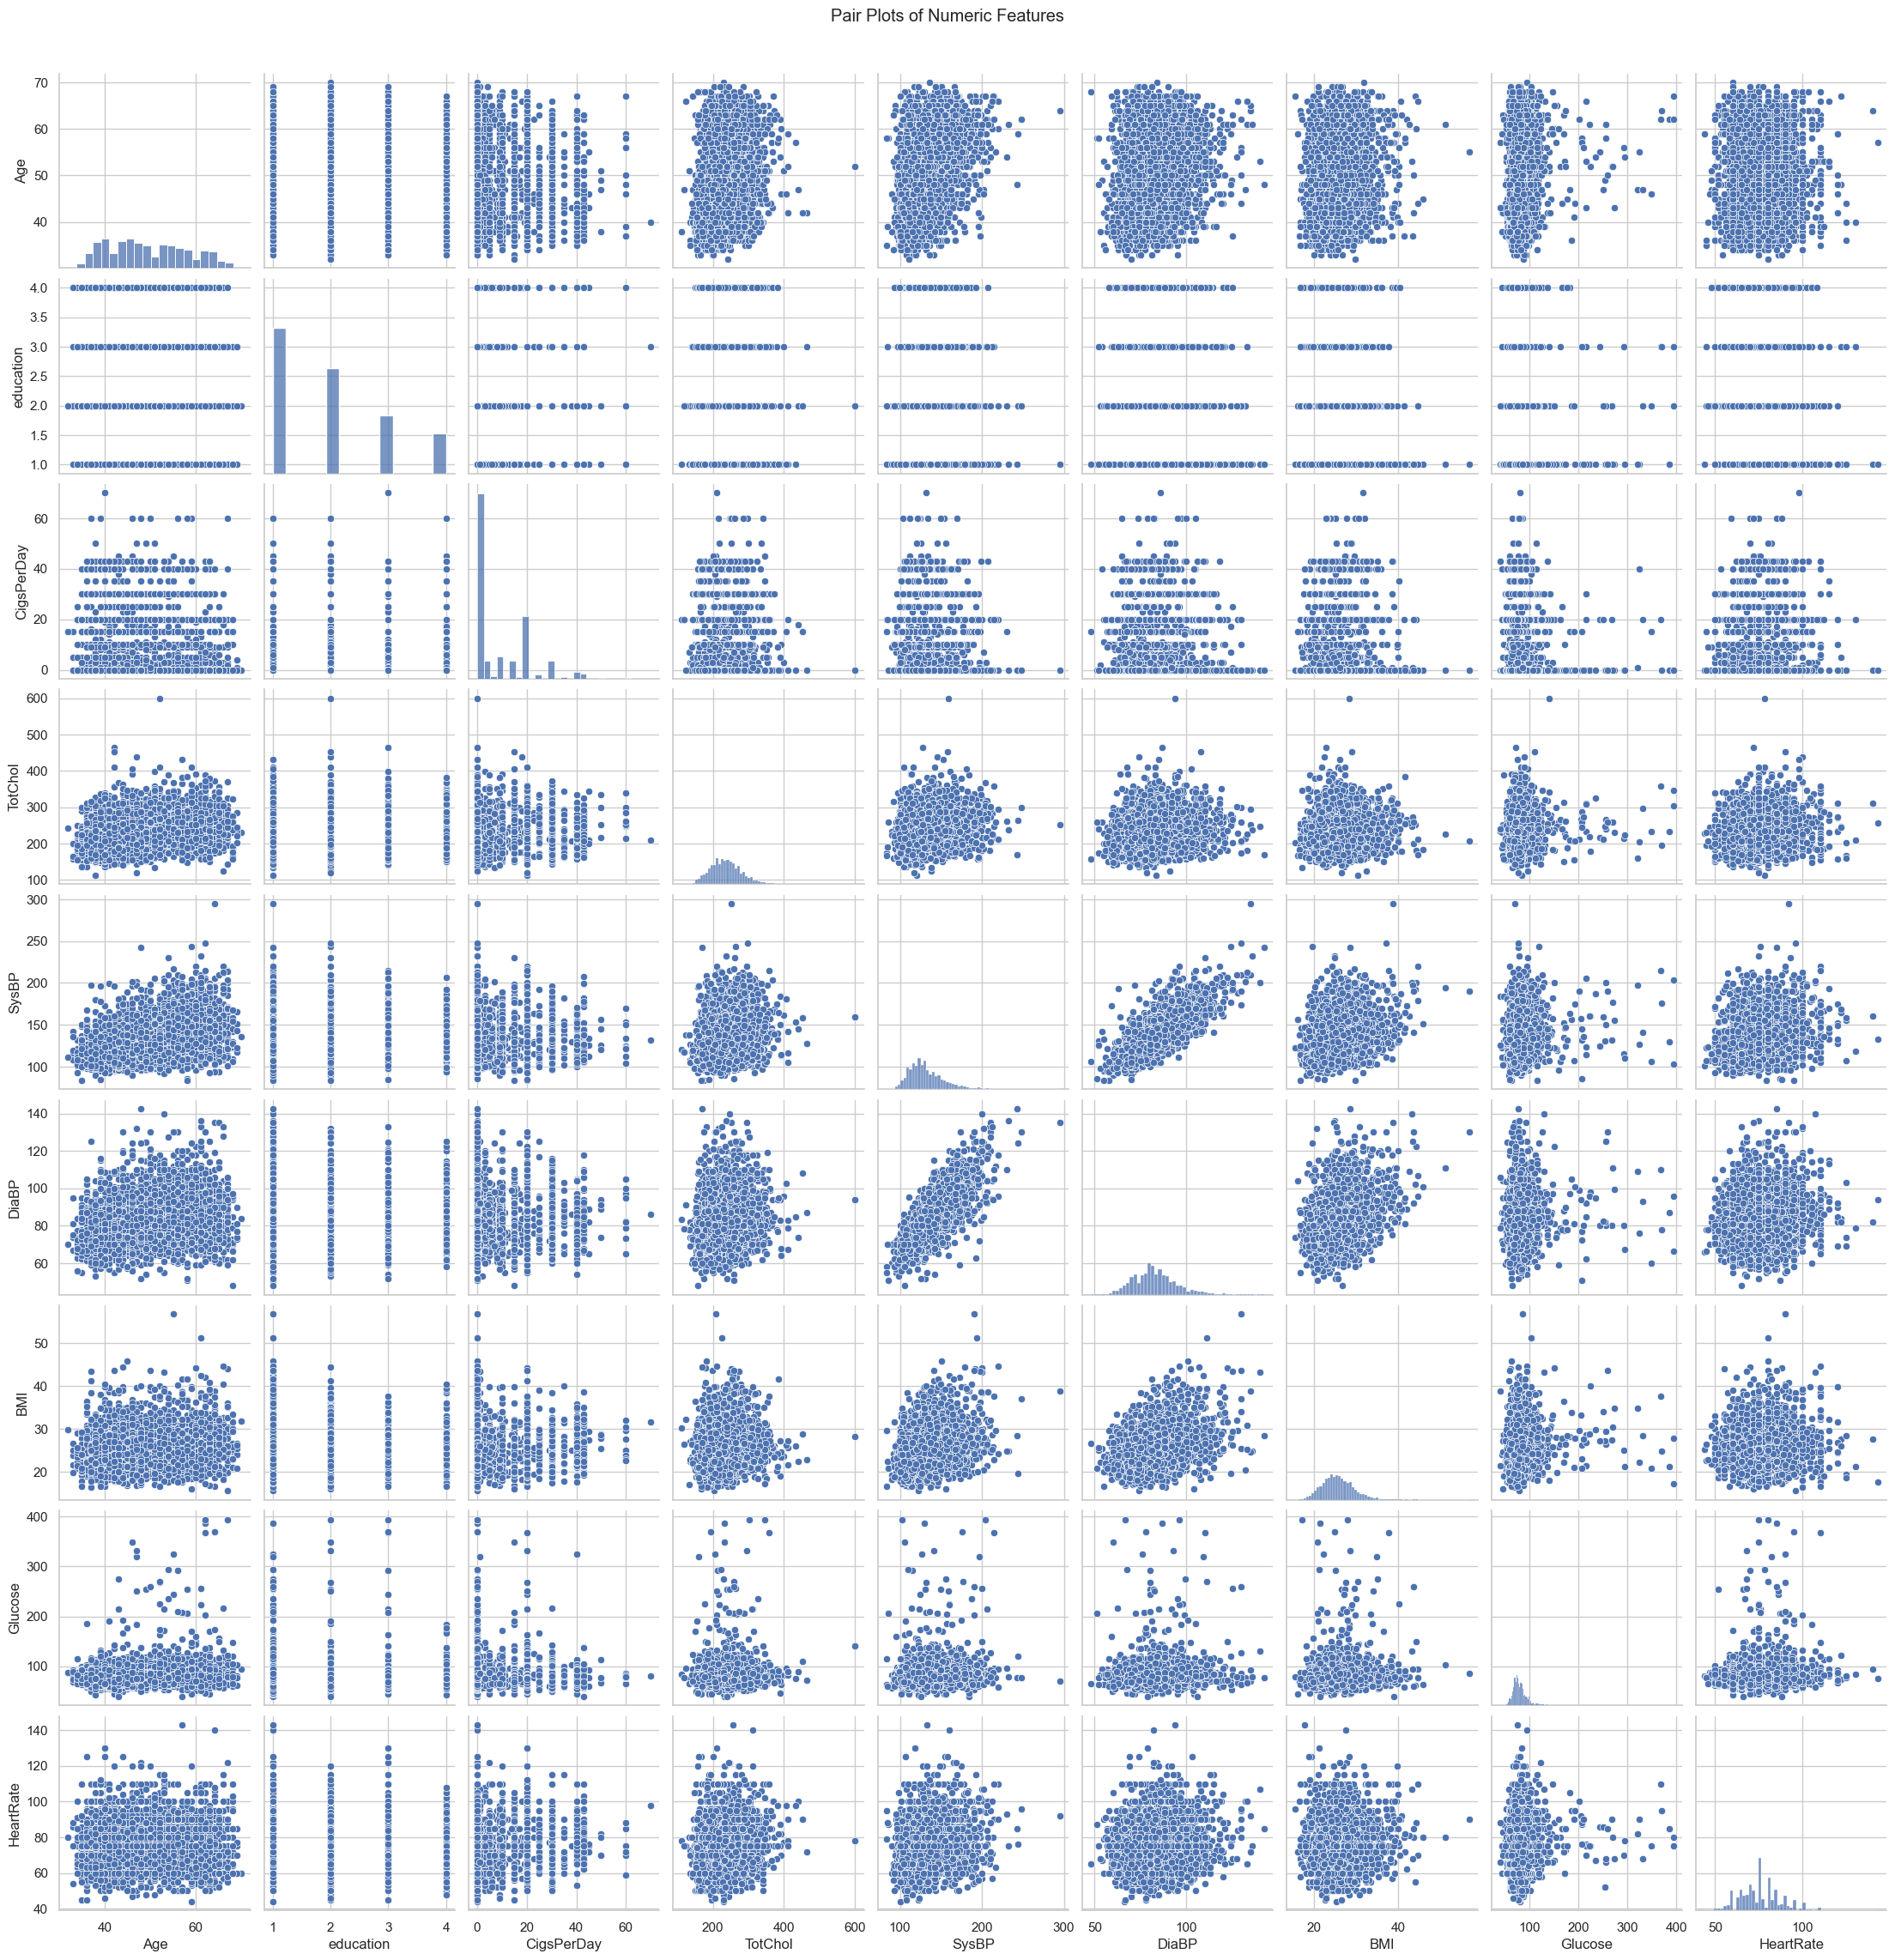

In [27]:
# Create pair plots
sns.pairplot(df[numeric_features])
plt.suptitle('Pair Plots of Numeric Features', y=1.02)
plt.show()

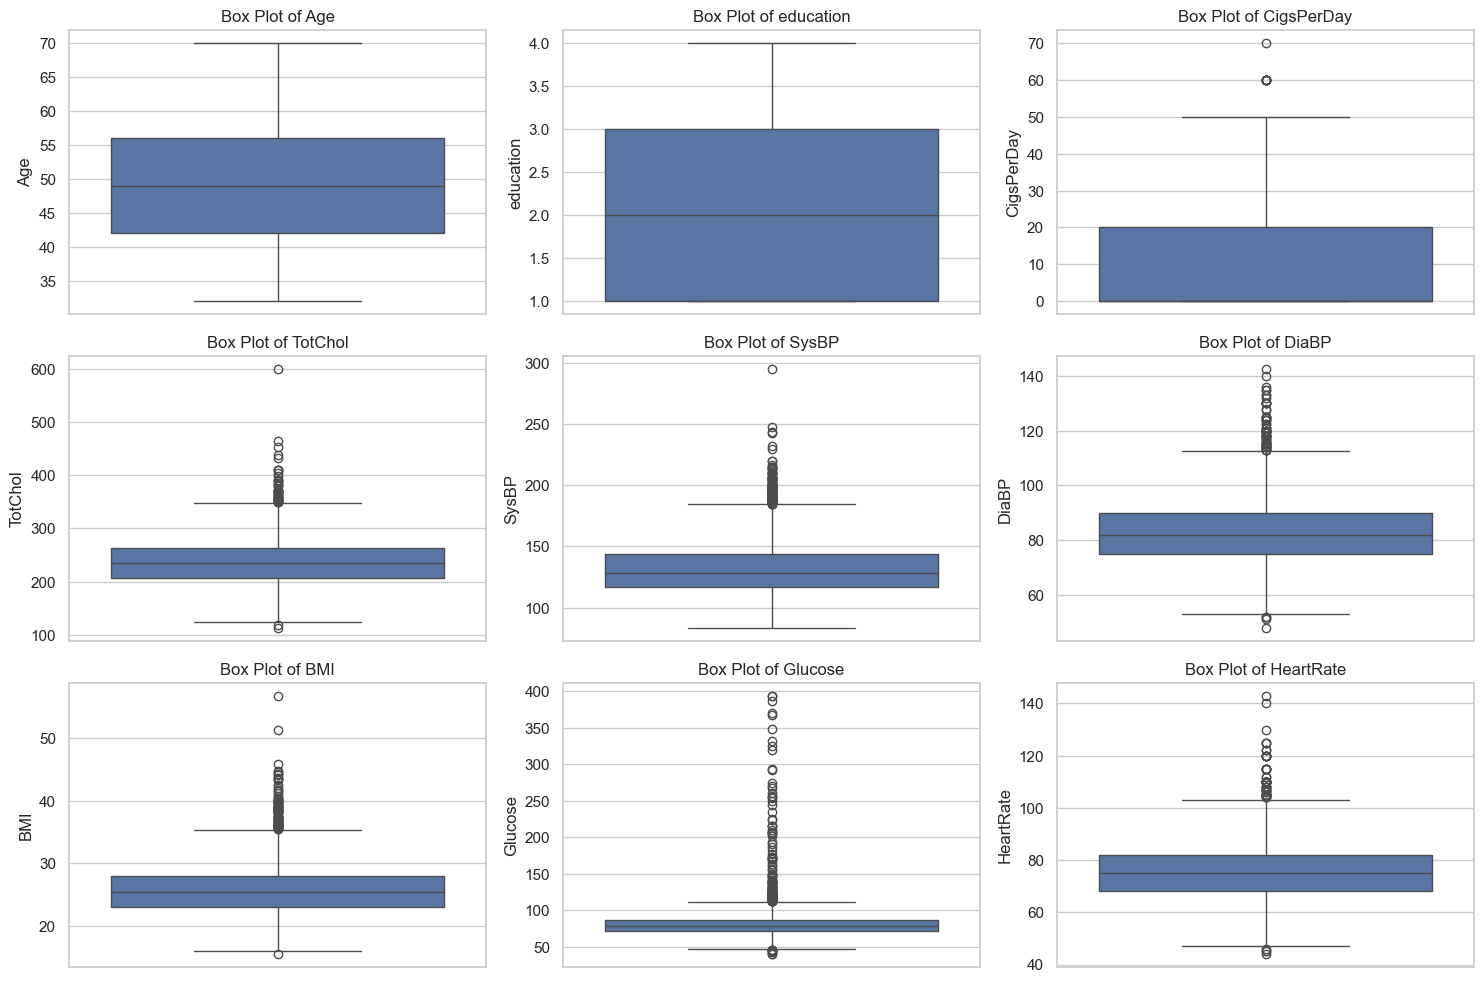

In [28]:
# Create box plots for each numeric feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [29]:
# Since we found outliers in boxplot, remove outliers using IQR
def remove_outliers(df, numeric_features):
    for feature in numeric_features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

# Remove outliers
df_cleaned = remove_outliers(df, numeric_features)

# Display the cleaned DataFrame
print(df_cleaned.describe())

               Sex          Age    education  CurrentSmoker   CigsPerDay  \
count  3158.000000  3158.000000  3158.000000    3158.000000  3158.000000   
mean      0.453768    48.993350     2.015199       0.495567     9.110513   
std       0.497937     8.437868     1.026304       0.500060    11.707831   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    48.000000     2.000000       0.000000     0.000000   
75%       1.000000    55.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    50.000000   

            BPMeds  PrevalentStroke  PrevalentHyp     Diabetes      TotChol  \
count  3158.000000      3158.000000   3158.000000  3158.000000  3158.000000   
mean      0.019633         0.005066      0.262191     0.006333   234.149145   
std       0.138756         0.071010      0.439896     0.079341    40.313661   

At this point, data has been cleaned and explored

New Variable that holds the cleaned data is now named "df_cleaned"

# Feature Engineering

Now, perform Feature Engineering which include:

1. Data Splitting: training set and testing set 
2. Data Normalization (involve numerical variable)
3. balance / imbalance: use smote to balance (balance the target variable only)
4. Data Encoding (not needed since all data in numerical form already)
5. impute: to handle null values (not required in this project because we dont have any null values)
6. timestamp: to handle time value (not required in this project because we dont have any time values)

In [33]:
df_cleaned.head()

,Sex,Age,education,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,10YearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [34]:
print(df_cleaned.dtypes)

Sex                  int64
Age                  int64
education          float64
CurrentSmoker        int64
CigsPerDay         float64
BPMeds             float64
PrevalentStroke      int64
PrevalentHyp         int64
Diabetes             int64
TotChol            float64
SysBP              float64
DiaBP              float64
BMI                float64
HeartRate          float64
Glucose            float64
10YearCHD            int64
dtype: object


Now, all values are in numerical forms and ready for further analysis!

### Correlation Matrix

Correlation Matrix helps to identify features that are strongly related to the target variable and to detect features that are highly related to each other (multicollinearity).

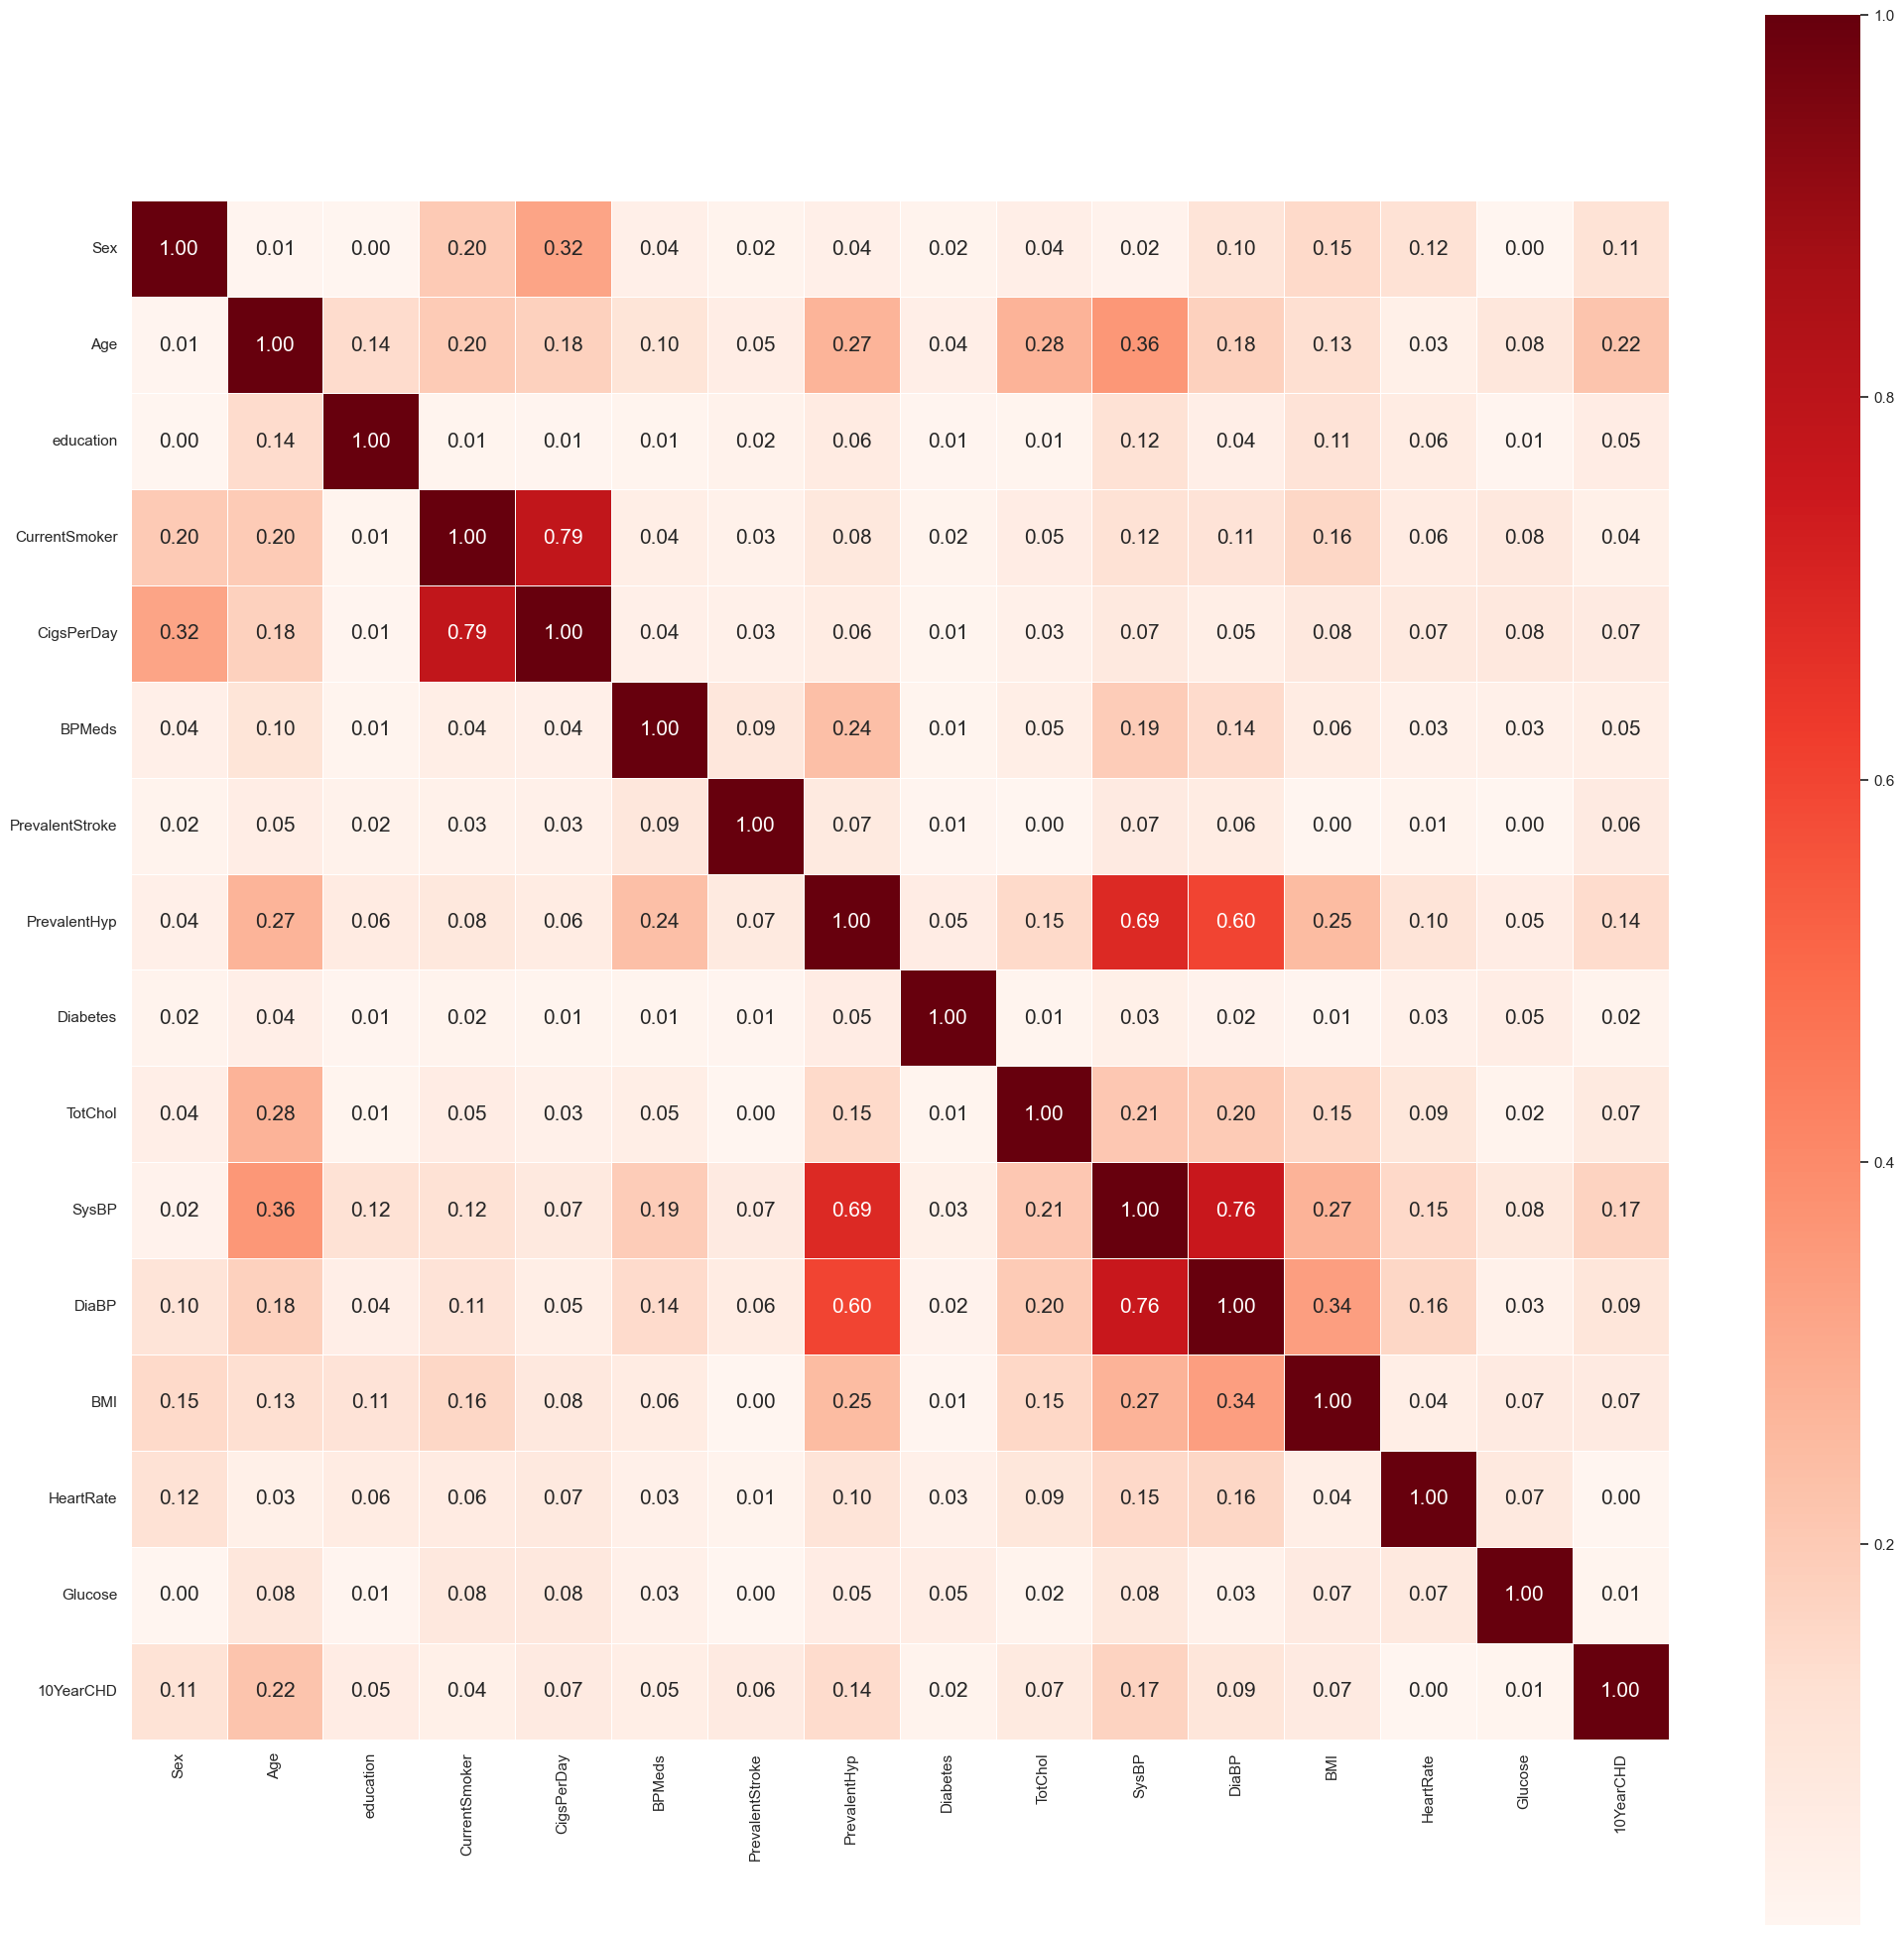

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df_cleaned.corr().abs()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, cmap='Reds', linewidths=.5)
plt.show()

### Feature Selection

In this phase, I choose features that are highly correlated to the target variable : 10YearCHD

In [41]:
# Convert all columns except 'BMI' weight and height to float
#df_cleaned = df_cleaned.astype({col: float for col in df_cleaned.columns if col != '10YearCHD' }) 
#if col != 'BMI'

# Verify the data types
print(df_cleaned.dtypes)

Sex                  int64
Age                  int64
education          float64
CurrentSmoker        int64
CigsPerDay         float64
BPMeds             float64
PrevalentStroke      int64
PrevalentHyp         int64
Diabetes             int64
TotChol            float64
SysBP              float64
DiaBP              float64
BMI                float64
HeartRate          float64
Glucose            float64
10YearCHD            int64
dtype: object


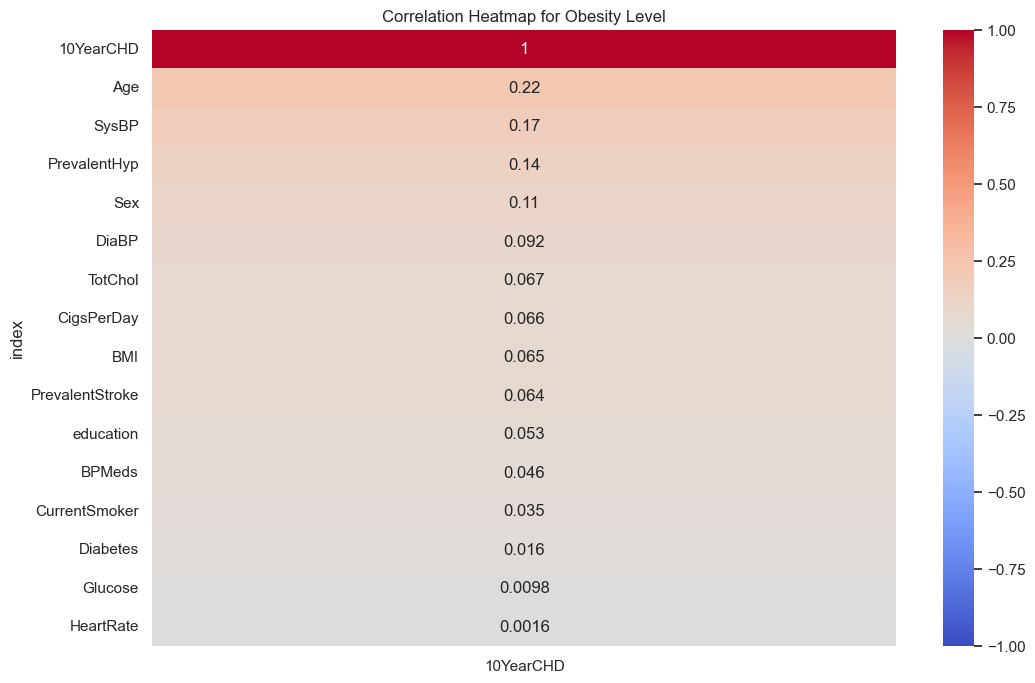

In [42]:
correlations = df_cleaned.corr()
target_correlations = correlations['10YearCHD'].abs()

sorted_target = target_correlations.to_frame().reset_index()
sorted_corr = sorted_target.sort_values(by='10YearCHD', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(sorted_corr.set_index('index'), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Obesity Level")
plt.show()

In [43]:
N = 13 # Number of top features to select
top_features = target_correlations.nlargest(N).index
X_selected = df_cleaned[top_features]

# Print the names of the selected features
print(top_features)

Index(['10YearCHD', 'Age', 'SysBP', 'PrevalentHyp', 'Sex', 'DiaBP', 'TotChol',
       'CigsPerDay', 'BMI', 'PrevalentStroke', 'education', 'BPMeds',
       'CurrentSmoker'],
      dtype='object')


In [44]:
features = ['Age', 'SysBP', 'PrevalentHyp', 'Sex', 'DiaBP', 'TotChol',
       'CigsPerDay', 'BMI', 'PrevalentStroke', 'education', 'BPMeds',
       'CurrentSmoker']
target = '10YearCHD'

### Data Splitting

In [46]:
# split dataset : train set and test set
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X = df_cleaned[features]
y = df_cleaned[target]
X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=0.3, random_state=0, stratify=y)

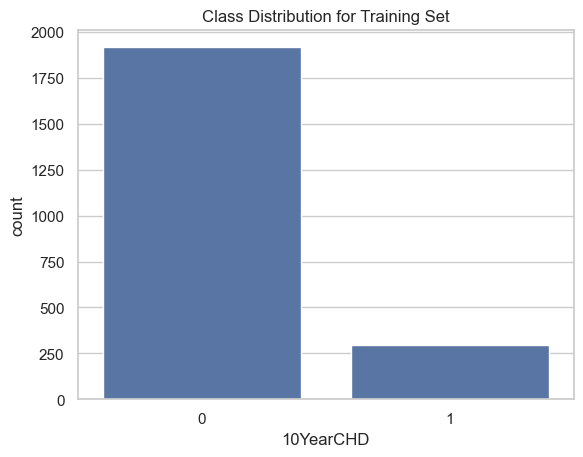

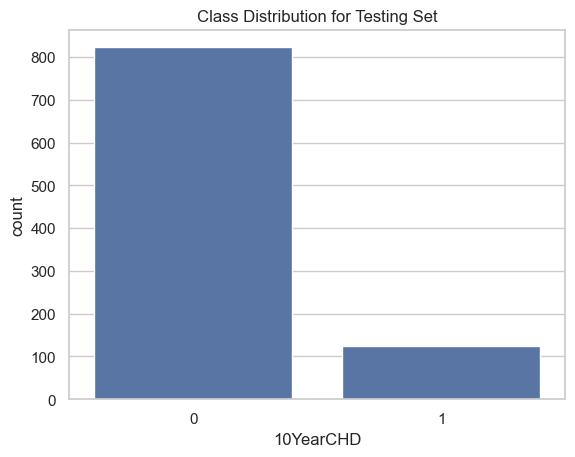

In [47]:
#visualize classes after splitting
plt.figure()
sns.countplot(x='10YearCHD', data = pd.DataFrame({'10YearCHD' :y_train}))
plt.title('Class Distribution for Training Set')
plt.show()
plt.figure()
sns.countplot(x='10YearCHD', data = pd.DataFrame({'10YearCHD':y_test}))
plt.title('Class Distribution for Testing Set')
plt.show()

In [48]:
# Check class distribution
print("Training set class distribution:\n", pd.Series(y_train).value_counts())
print("Test set class distribution:\n", pd.Series(y_test).value_counts())

Training set class distribution:
 0    1917
1     293
Name: count, dtype: int64
Test set class distribution:
 0    823
1    125
Name: count, dtype: int64


### Data Normalization

In [50]:
from sklearn.preprocessing import MinMaxScaler

# Selecting float features to normalize
float_features = ['education', 'CigsPerDay', 'BPMeds', 'TotChol', 'SysBP',
                  'DiaBP', 'BMI', 'HeartRate', 'Glucose']

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Normalize the float features
df_cleaned[float_features] = min_max_scaler.fit_transform(df_cleaned[float_features])

# Display the normalized DataFrame
print(df_cleaned)


      Sex  Age  education  CurrentSmoker  CigsPerDay  BPMeds  PrevalentStroke  \
0       1   39   1.000000              0        0.00     0.0                0   
1       0   46   0.333333              0        0.00     0.0                0   
2       1   48   0.000000              1        0.40     0.0                0   
3       0   61   0.666667              1        0.60     0.0                0   
4       0   46   0.666667              1        0.46     0.0                0   
...   ...  ...        ...            ...         ...     ...              ...   
4231    1   58   0.666667              0        0.00     0.0                0   
4232    1   68   0.000000              0        0.00     0.0                0   
4233    1   50   0.000000              1        0.02     0.0                0   
4234    1   51   0.666667              1        0.86     0.0                0   
4237    0   52   0.333333              0        0.00     0.0                0   

      PrevalentHyp  Diabete

### Data Balancing

In [52]:
!pip install imbalanced-learn
!pip install imblearn

In [53]:
import pandas as pd
from imblearn.over_sampling import SMOTE

smt = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=5)
#smt = SMOTE(sampling_strategy="auto", random_state=42, k_neighbors=1)
# Fit smote
X_res, y_res = smt.fit_resample(X_train, y_train)

Class distribution after SMOTE:
target
0    1917
1    1917
Name: count, dtype: int64


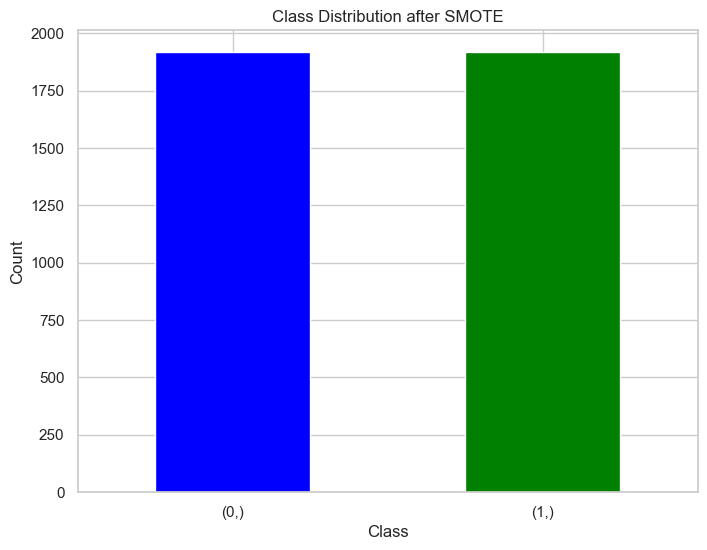

In [54]:
y_res_df = pd.DataFrame(y_res, columns=['target'])

# Print the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_res_df['target'].value_counts())

# Plot the class distribution
plt.figure(figsize=(8, 6))
y_res_df.value_counts().plot(kind="bar", color=['blue', 'green', 'red'])  # Assuming three classes
plt.title("Class Distribution after SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

# Logistic Regression Model Construction

In [56]:
#to begin logistic regression model analysis,----------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

# Reshape y_res to a 1-dimensional array
y_res = np.ravel(y_res)

logreg = LogisticRegression(solver='lbfgs',max_iter=1000) #initialize logistic regression model
logreg.fit(X_res, y_res) #Train model
#check performance on training set (after applying SMOTE)
print('Training accuracy: ', logreg.score(X_res,y_res))

Training accuracy:  0.6791862284820032


In [57]:
# Predict on the test set using the best logistic regression model
y_pred_lr = logreg.predict(X_test) 

# Print the predictions
print("Predictions on the test set after tuning:", y_pred_lr) 

Predictions on the test set after tuning: [1 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0
 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0
 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1
 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1

In [58]:
y_test = y_test.ravel()

Then, Evaluate Model

In [60]:
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy of the logistic regression model on the test set.
testing_accuracy = accuracy_score(y_test, y_pred_lr)#TESTING ACCURACY AFTER TUNING
 
# Calculate precision, recall, and F1-score for the test set
testing_precision = precision_score(y_test, y_pred_lr, average='weighted')
testing_recall = recall_score(y_test, y_pred_lr, average='weighted')
testing_f1_score = f1_score(y_test, y_pred_lr, average='weighted')

# Print evaluation metrics for the testing set
print("Logistic Regression Evaluation Scores (Testing Set):")
print(f"Accuracy: {testing_accuracy:.4f}")
print(f"Precision: {testing_precision:.4f}")
print(f"Recall: {testing_recall:.4f}")
print(f"F1-score: {testing_f1_score:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, zero_division=0))

Logistic Regression Evaluation Scores (Testing Set):
Accuracy: 0.6498
Precision: 0.8371
Recall: 0.6498
F1-score: 0.7060

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.65      0.76       823
           1       0.23      0.68      0.34       125

    accuracy                           0.65       948
   macro avg       0.58      0.66      0.55       948
weighted avg       0.84      0.65      0.71       948



The classification report shows:

- For class 0 (No risk of CHD): Precision of 0.93, Recall of 0.64, and F1-score of 0.76.
- For class 1 (Risk of CHD): Precision of 0.22, Recall of 0.67, and F1-score of 0.33.
  
Overall, the model achieved an accuracy of 0.64 on the testing set.

### Logistic Regression Model Confusion Matrix

[[531 292]
 [ 40  85]]


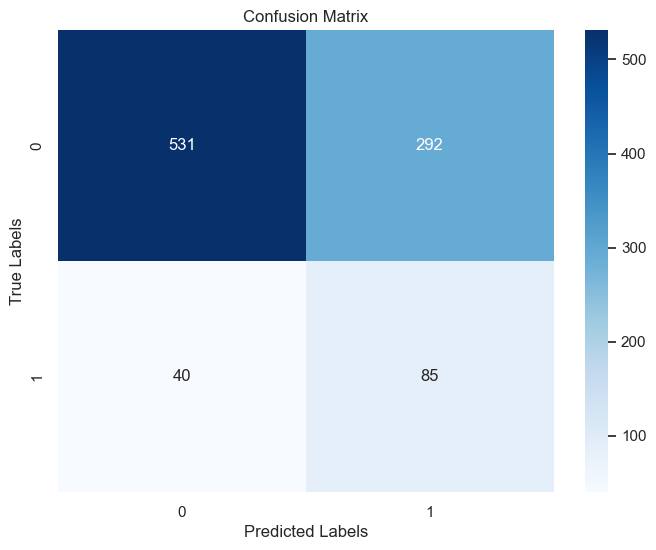

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

The confusion matrix heatmap provides an overview of the model's binary classification performance:

-True Positive (TP): The model correctly predicted a positive outcome when it was actually true. There are 85 instances of TP.

-False Positive (FP): The model incorrectly predicted a positive outcome when it was actually false. There are 292 instances of FP.

-False Negative (FN): The model incorrectly predicted a negative outcome when it was actually true. There are 40 instances of FN.

-True Negative (TN): The model correctly predicted a negative outcome when it was actually false. There are 531 instances of TN.

### Logistic Regression Model Comparison

Comparing Training and Test Set 

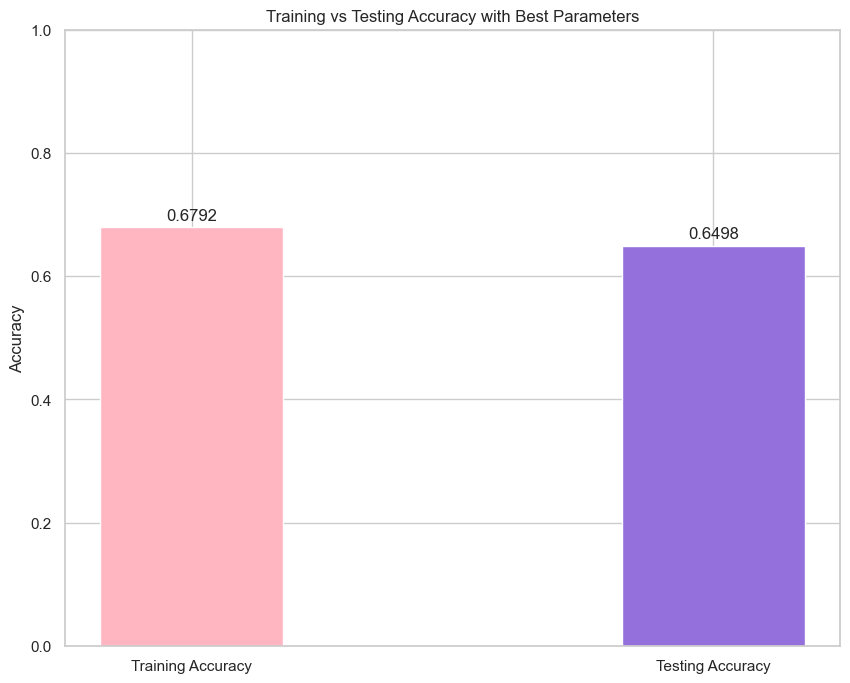

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Data
#training_accuracy_best_param = best_logistic.score(X_res, y_res)
#testing_accuracy_best_param = accuracy_score(y_test, y_pred_lr)
Training_accuracy=  logreg.score(X_res,y_res)
# Colors
colors = ['lightpink', 'mediumpurple']

# Labels
labels = ['Training Accuracy', 'Testing Accuracy']
values = [Training_accuracy, testing_accuracy]

# Plot
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axes here
bars = ax.bar(x, values, width, color=colors)

# Add labels, title, and legend
ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy with Best Parameters')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)  # Set y-axis limits between 0 and 1

# Add data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.4f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()

### Logistic Regression Model Evaluation

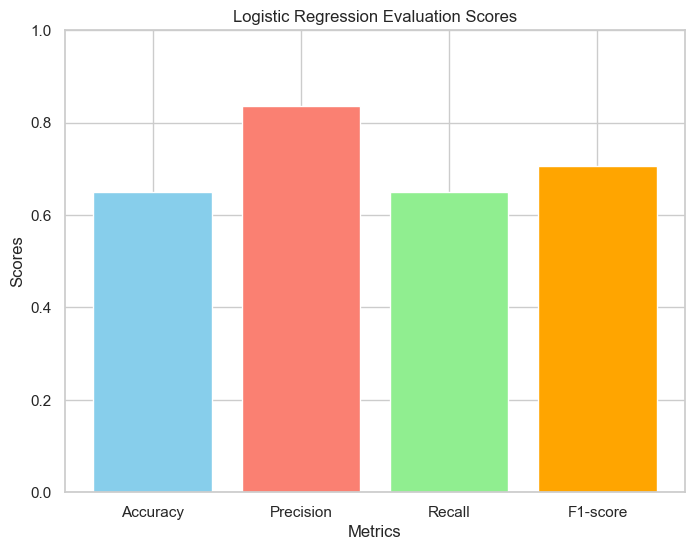

In [70]:
import matplotlib.pyplot as plt

# Evaluation scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [0.6498, 0.8371, 0.6498, 0.7060]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['skyblue', 'salmon', 'lightgreen', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Evaluation Scores')
plt.ylim(0, 1) 
plt.show()

Based on the evaluation scores of the Logistic Regression model aimed at predicting whether patients have a 10-year risk of future coronary heart disease (CHD), here's what we found:

The model achieved an accuracy score of 0.6498, showing how often it correctly predicts the presence or absence of CHD risk. It demonstrated strong precision with a score of 0.8371, meaning it efficiently avoided false positives. However, the recall score, indicating how well the model identifies all actual positives, was 0.6498, suggesting room for improvement in identifying all patients at risk. The F1-score, which balances precision and recall, was 0.7017, reflecting moderate overall model performance.


In summary, while Logistic Regression offers simplicity, interpretability, and efficiency, its performance can be limited by its assumptions of linearity and its ability to handle complex relationships in the data. These factors should be carefully considered when deciding whether LR is the appropriate model for a particular predictive task, such as predicting the 10-year risk of coronary heart disease.